In [150]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
n_inp,n_out,n_hidden= 10,10,5
n=100
lr=1e-3
data=np.random.rand(n,n_inp)

In [142]:
def loss(pred,trg):
    return np.sum((trg-pred)**2)/pred.shape[0]

In [143]:
def sig(x):
    return np.exp(x) / (np.exp(x) + 1)
def back_sig(x):
    return sig(x)*(1-sig(x))

In [146]:
class NN():
    def __init__(self,lr=1e-3,n=100):
        self.weights()
        self.lr=lr
        self.losses=[]
        self.epochs=n
    def weights(self):
        self.W_inp=np.random.randn(n_inp,n_hidden)
        self.W_h=np.random.randn(n_hidden,n_hidden)
        self.W_out=np.random.randn(n_hidden,n_out)
    def forward(self,x):
        self.inp1=sig(x.dot(self.W_inp))
        self.inp2=sig(self.inp1.dot(self.W_h))
        self.inp3=sig(self.inp2.dot(self.W_out))
        return self.inp3
    def backward(self,x):
        dl_inp3=2*(self.inp3-x) 
        dl_W_out=(self.inp2.T).dot(dl_inp3*back_sig(self.inp2.dot(self.W_out)))
        dl_inp2=(dl_inp3*back_sig(self.inp2.dot(self.W_out))).dot(self.W_out.T)
        dl_W_h=(self.inp1.T).dot(back_sig(dl_inp2))
        dl_inp1=back_sig(dl_inp2).dot(self.W_h.T)
        dl_W_inp=x.T.dot(back_sig(dl_inp1))
        return dl_W_out,dl_W_h,dl_W_inp
    def train(self,x):
        for e in range(self.epochs):
            l=loss(self.forward(x),x)
            self.losses.append(l)
            dl_W_out,dl_W_h,dl_W_inp=self.backward(x)
            self.W_inp= self.W_inp - lr*dl_W_inp
            self.W_h=self.W_h - lr*dl_W_h
            self.W_out=self.W_out - lr*dl_W_out

In [147]:
model=NN()

In [148]:
model.train(data)

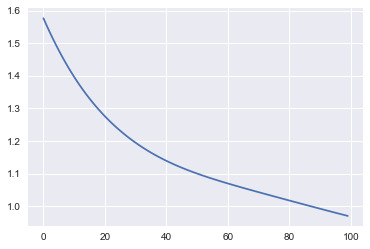

In [151]:
sns.set(color_codes=True)
plt.plot(model.losses)

In [168]:
class linear():
    def __init__(self,inp,out):
        self.W=np.random.randn(inp,out)
    def forward(self,x):
        self.x=x
        return x.dot(self.W)
    def backward(self,in_grad):
        dl_w=(self.x.T).dot(in_grad)
        dl_x=in_grad.dot(self.W.T)
        return dl_w,dl_x

In [217]:
class NN2():
    def __init__(self,n_inp,n_hidden,n_out):
        self.lay1=linear(n_inp,n_hidden)
        self.lay2=linear(n_hidden,n_hidden)
        self.lay3=linear(n_hidden,n_out)
        self.losses=[]
    def forward(self,x):
        return self.lay3.forward(self.lay2.forward(self.lay1.forward(x)))
    def backward(self,output,trg):
        grd=2*(output-trg)/output.shape[0]
        dl_w_ly3,dl_x_ly3=self.lay3.backward(grd)
        dl_w_ly2,dl_x_ly2=self.lay2.backward(dl_x_ly3)
        dl_w_ly1,dl_x_ly1=self.lay1.backward(dl_x_ly2)
        return dl_w_ly3,dl_w_ly2,dl_w_ly1
    def train(self,x,y,epochs=100,lr=1e-3):
        for e in range(epochs):
            l=loss(self.forward(x),y)
            self.losses.append(l)
            dl_W_out,dl_W_h,dl_W_inp=self.backward(self.forward(x),y)
            #print(dl_W_out,dl_W_h,dl_W_inp)
            self.lay1.W -= lr*dl_W_inp
            self.lay2.W -= lr*dl_W_h
            self.lay3.W -= lr*dl_W_out
    def plot(self):
        import seaborn as sns
        sns.set(color_codes=True)
        plt.figure(figsize=(10,6))
        plt.plot(self.losses)

In [218]:
m=NN2(n_inp,n_hidden,n_out)

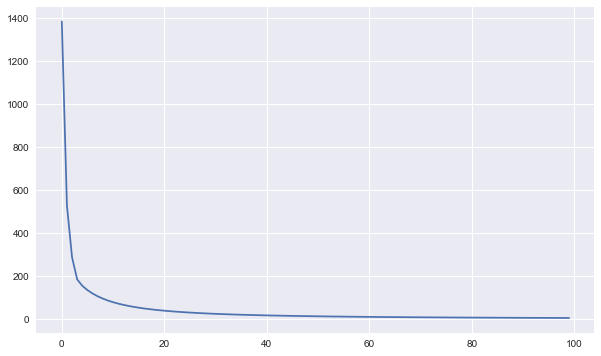

In [219]:
m.train(data,data)
m.plot()